In [1]:
## import libraries
import requests  # Makes HTTP requests to fetch web pages from URLs
from bs4 import BeautifulSoup  # Parses HTML content into navigable Python objects for web scraping
import pandas as pd  # Creates and manipulates DataFrames for organizing scraped data into tables
import time  # Adds delays between requests to avoid overwhelming the server
from random import uniform  # Generates random time intervals to make scraping delays less predictable

In [2]:
## create headers

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

In [3]:
site=requests.get

In [4]:
## Request web content

##scrape url website
url= "https://arlo.riseforanimals.org/browse?animals=1&radius=500"
response=requests.get(url,headers=headers)

In [5]:
response.status_code

200

'<!doctype html>\n<html data-n-head-ssr lang="en-US" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en-US%22%7D%7D">\n  <head >\n    <title>Browse Labs | Animal Research Laboratory Overview (ARLO)</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0&quot;"><meta data-n-head="ssr" data-hid="description" name="description" content="We’re on a mission to save animals from suffering."><meta data-n-head="ssr" property="og:description" content="We’re on a mission to save animals from suffering."><meta data-n-head="ssr" name="twitter:description" content="We’re on a mission to save animals from suffering."><meta data-n-head="ssr" property="og:locale" content="en_US"><meta data-n-head="ssr" property="og:type" content="website"><meta data-n-head="ssr" property="og:image" content="https://arlo.riseforanimals.org/assets/img/social.png"><meta data-n-head="ssr" property="og:image:secure_url"
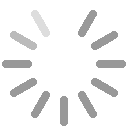
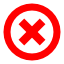
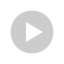
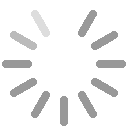

In [6]:
response.text

b'<!doctype html>\n<html data-n-head-ssr lang="en-US" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en-US%22%7D%7D">\n  <head >\n    <title>Browse Labs | Animal Research Laboratory Overview (ARLO)</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0&quot;"><meta data-n-head="ssr" data-hid="description" name="description" content="We\xe2\x80\x99re on a mission to save animals from suffering."><meta data-n-head="ssr" property="og:description" content="We\xe2\x80\x99re on a mission to save animals from suffering."><meta data-n-head="ssr" name="twitter:description" content="We\xe2\x80\x99re on a mission to save animals from suffering."><meta data-n-head="ssr" property="og:locale" content="en_US"><meta data-n-head="ssr" property="og:type" content="website"><meta data-n-head="ssr" property="og:image" content="https://arlo.riseforanimals.org/assets/img/social.png"><meta data-n-head="s
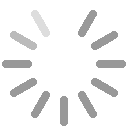
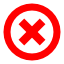
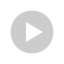
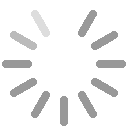

In [7]:
response.content

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en-US%22%7D%7D" data-n-head-ssr="" lang="en-US">
<head>
<title>Browse Labs | Animal Research Laboratory Overview (ARLO)</title><meta charset="utf-8" data-n-head="ssr"/><meta content='width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0"' data-n-head="ssr" name="viewport"/><meta content="We’re on a mission to save animals from suffering." data-hid="description" data-n-head="ssr" name="description"/><meta content="We’re on a mission to save animals from suffering." data-n-head="ssr" property="og:description"/><meta content="We’re on a mission to save animals from suffering." data-n-head="ssr" name="twitter:description"/><meta content="en_US" data-n-head="ssr" property="og:locale"/><meta content="website" data-n-head="ssr" property="og:type"/><meta content="https://arlo.riseforanimals.org/assets/img/social.png" data-n-head="ssr" property="og:image"/><meta content="https://arlo.riseforanimals.org/assets/img/
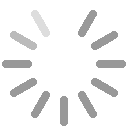
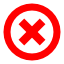
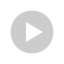
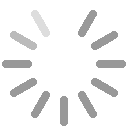

In [8]:
#### convert response.text into a BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en-US%22%7D%7D" data-n-head-ssr="" lang="en-US">
 <head>
  <title>
   Browse Labs | Animal Research Laboratory Overview (ARLO)
  </title>
  <meta charset="utf-8" data-n-head="ssr"/>
  <meta content='width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0"' data-n-head="ssr" name="viewport"/>
  <meta content="We’re on a mission to save animals from suffering." data-hid="description" data-n-head="ssr" name="description"/>
  <meta content="We’re on a mission to save animals from suffering." data-n-head="ssr" property="og:description"/>
  <meta content="We’re on a mission to save animals from suffering." data-n-head="ssr" name="twitter:description"/>
  <meta content="en_US" data-n-head="ssr" property="og:locale"/>
  <meta content="website" data-n-head="ssr" property="og:type"/>
  <meta content="https://arlo.riseforanimals.org/assets/img/social.png" data-n-head="ssr" property="og:image"/>
  <meta content="https:/
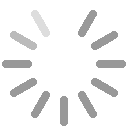
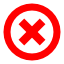
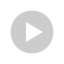
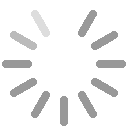

In [9]:
##prettify our printout
print(soup.prettify())

In [88]:
## full scrape example of multiple pages with error handling and snoozing
base_url= "https://arlo.riseforanimals.org/browse?animals=1&page="
page_html = []        # to store each page's HTML (optional)
broken_links= []

for page_number in range(1,7): ##because you don't want it to start scaping at page 0
    url= f"{base_url}{page_number}"
    print(f" Scraping page {page_number}, url: {url}")
    try:
        response = requests.get(url)
        response.raise_for_status()  # will raise an error for bad responses (e.g. 404)

        # STEP 5: Parse HTML using BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")

        # (We’ll extract data later — for now, just store the soup or HTML)
        page_html.append(soup)

    except Exception as e:
        print(f"Oh no...encountered an issue: {e} at {url}")
        broken_links.append(url)
    finally: 
        snoozer=uniform(5,20)
        print(f"Snoozing for {snoozer} seconds before next scrape")
        time.sleep(snoozer)

print("done scaping all urls")

 Scraping page 1, url: https://arlo.riseforanimals.org/browse?animals=1&page=1
Snoozing for 14.298680095435055 seconds before next scrape
 Scraping page 2, url: https://arlo.riseforanimals.org/browse?animals=1&page=2
Snoozing for 6.998368638071924 seconds before next scrape
 Scraping page 3, url: https://arlo.riseforanimals.org/browse?animals=1&page=3
Snoozing for 18.224226133203985 seconds before next scrape
 Scraping page 4, url: https://arlo.riseforanimals.org/browse?animals=1&page=4
Snoozing for 7.63258913488302 seconds before next scrape
 Scraping page 5, url: https://arlo.riseforanimals.org/browse?animals=1&page=5
Snoozing for 12.847422958898647 seconds before next scrape
 Scraping page 6, url: https://arlo.riseforanimals.org/browse?animals=1&page=6
Snoozing for 13.395373992296285 seconds before next scrape
done scaping all urls


In [45]:
##isolate research facility names
facilities=soup.find_all("h2")
facilities

[<h2><a href="/entity/brown-mackie-college-salina-ks-3353">Brown Mackie College [Salina, KS]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-canton-oh-3232">Brown Mackie College [Canton, OH]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-michigan-city-in-3346">Brown Mackie College [Michigan City, IN]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-louisville-ky-3267">Brown Mackie College [Louisville, KY]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-lenexa-ks-3260">Brown Mackie College [Lenexa, KS]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-fort-wayne-in-3237">Brown Mackie College [Fort Wayne, IN]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-findlay-oh-3230">Brown Mackie College [Findlay, OH]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-akron-oh-3231">Brown Mackie College [Akron, OH]</a></h2>,
 <h2><a href="/entity/brown-mackie-college-nm-3327">Brown Mackie College [NM]</a></h2>,
 <h2><a href="/entity/broadview-university-2094">Broadview

In [66]:
# I want it to go through all 6 pages, for all research facilities- how do i do this
# for labs in facilities:
#     print(facilities.get_text())
     

In [51]:
# for lab in facilities:
#             lab_name = lab.get_text(strip=True)
#             all_labs.append(lab_name)
#             print(lab_name)

NameError: name 'all_labs' is not defined

In [96]:
## trying to isolate the APHIS numer and type of institution
soup.find_all("p", class_="fs-12")

[<p class="fs-12"><strong>APHIS #:</strong> 48-R-0114 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 31-R-0127 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 32-R-0047 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 61-R-0113 [registration canceleld]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 48-R-0113 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 32-R-0051 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 31-R-0125 [registration cancelled]  <strong>Type:</strong> Private Higher Education</p>,
 <p class="fs-12"><strong>APHIS #:</strong> 31-R-0126 [registration c

In [98]:
##used AI for this because I was having trouble extracting the aphis number. The code finds every <strong> tag,then finds APHIS #, then finds text immediately after that, and uses strip 
##APHIS numbers
aphis_numbers = [
    strong.next_sibling.strip()
    for strong in soup.find_all("strong", string="APHIS #:")
]

print(aphis_numbers)

['48-R-0114 [registration cancelled]', '31-R-0127 [registration cancelled]', '32-R-0047 [registration cancelled]', '61-R-0113 [registration canceleld]', '48-R-0113 [registration cancelled]', '32-R-0051 [registration cancelled]', '31-R-0125 [registration cancelled]', '31-R-0126 [registration cancelled]', '85-R-0025 [registration cancelled]', '87-R-0021 [registration cancelled]', '87-R-0027 [registration cancelled]', '74-R-0209 [registration cancelled]', '93-R-0508 [registration cancelled]', '93-R-0064 [registration cancelled]', '21-R-0217 [registration cancelled]', '14-R-0041 [registration cancelled]', '33-R-0023 [registration cancelled]', '72-R-0103 [registration cancelled]', 'None', '34-R-0156 [registration cancelled]', '34-R-0160 [registration cancelled]', '34-R-0162 [registration cancelled]', '32-R-0054 [registration cancelled]', '51-R-0089 [registration cancelled]', '35-R-0009 [registration cancelled]', '86-R-0038 [registration cancelled]', '14-R-0204 [registration cancelled]', '48

In [100]:
## not sure if this is best format to use in the scraper or if there's one that's more list comprehension-y
##find lab type
lab_type = [
    strong.next_sibling.strip()
    for strong in soup.find_all("strong", string="Type:")
]

print(lab_type)

['Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Public Higher Education', 'Private Sector', 'Private Sector', 'Private Sector', 'Private Higher Education', 'Private Sector', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Higher Education', 'Private Sector', 'Private Sector', 'Private Sector', 'Private Higher Education', 'Private Sector', 'Private Sector', 'Private Sector', 'Private Higher Education', 'Private Sector', 'Private Sector', 'Private Higher Education', 'Private Sector', 'Private Higher Education', 'Private Higher Education', 'Private Sector', 'United States Department of Defense (DOD)']


In [144]:
type(lab_type)

list

In [128]:
## now trying to find number of records for each research facility
##first, isolate html
soup.find_all("li",class_="folder")

[<li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-salina-ks-3353/records">5</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-canton-oh-3232/records">8</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-michigan-city-in-3346/records">8</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-louisville-ky-3267/records">4</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-lenexa-ks-3260/records">8</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class="tdu-h" href="/entity/brown-mackie-college-fort-wayne-in-3237/records">8</a> <a class="tip">?</a></li>,
 <li class="folder"><strong>Records:</strong> <a class=

In [203]:
##list comprehension for number of records
records = [
    f"{li.find('strong').get_text()} {li.find('a', class_='tdu-h').get_text()}"
    for li in soup.find_all("li", class_="folder")
]
print(records)

['Records: 5', 'Records: 8', 'Records: 8', 'Records: 4', 'Records: 8', 'Records: 8', 'Records: 8', 'Records: 8', 'Records: 5', 'Records: 11', 'Records: 3', 'Records: 5', 'Records: 9', 'Records: 5', 'Records: 7', 'Records: 14', 'Records: 10', 'Records: 6', 'Records: 3', 'Records: 8', 'Records: 14', 'Records: 14', 'Records: 10', 'Records: 4', 'Records: 9', 'Records: 2', 'Records: 4', 'Records: 9', 'Records: 14', 'Records: 24', 'Records: 12', 'Records: 39', 'Records: 22', 'Records: 4', 'Records: 10', 'Records: 13', 'Records: 14', 'Records: 12']


In [175]:
##AWA animal count target, put in list comprehension
## first step, understand html
soup.find_all("li", class_="stats")

[<li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-college-salina-ks-3353/animals-used">94</a> <a class="tip">?</a></li>,
 <li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-college-canton-oh-3232/animals-used">308</a> <a class="tip">?</a></li>,
 <li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-college-michigan-city-in-3346/animals-used">120</a> <a class="tip">?</a></li>,
 <li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-college-louisville-ky-3267/animals-used">142</a> <a class="tip">?</a></li>,
 <li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-college-lenexa-ks-3260/animals-used">168</a> <a class="tip">?</a></li>,
 <li class="stats"><strong>AWA Animal Count (2015):</strong> <a class="tdu-h" href="/entity/brown-mackie-

In [199]:
##list comprehension for animal_count
animal_count = [
    f"{li.find('strong').get_text()} {li.find('a', class_='tdu-h').get_text()}"
    for li in soup.find_all("li", class_="stats")
]
print(animal_count)

['AWA Animal Count (2015): 94', 'AWA Animal Count (2015): 308', 'AWA Animal Count (2015): 120', 'AWA Animal Count (2015): 142', 'AWA Animal Count (2015): 168', 'AWA Animal Count (2015): 224', 'AWA Animal Count (2015): 157', 'AWA Animal Count (2015): 308', 'AWA Animal Count (2014): 291', 'AWA Animal Count (2021): 307', 'AWA Animal Count (2014): 3', 'AWA Animal Count (2017): 1', 'AWA Animal Count (2020): 1', 'AWA Animal Count (2015): 408', 'AWA Animal Count (2014): 241', 'AWA Animal Count (2020): 46', 'AWA Animal Count (2015): 139', 'AWA Animal Count (2017): 30', 'AWA Animal Count (2014): 4', 'AWA Animal Count (2015): 43', 'AWA Animal Count (2015): 59', 'AWA Animal Count (2014): 9', 'AWA Animal Count (2020): 78', 'AWA Animal Count (2013): 245', 'AWA Animal Count (2014): 11', 'AWA Animal Count (2014): 53', 'AWA Animal Count (2015): 147', 'AWA Animal Count (2019): 15', 'AWA Animal Count (2016): 4720', 'AWA Animal Count (2023): 39', 'AWA Animal Count (2019): 283', 'AWA Animal Count (2023): 

In [219]:
##isolate html for animals used in testing and list comprehension
## used ChatGPT for this
animals_used = [
    f"{li.strong.text.split(':')[0]}: {li.a.get_text(strip=True)}"
    for li in soup.select("li.seaƒh")
]
print(animals_used)

['AWA Animals Used (2015): Other Farm Animals, Dogs+3', 'AWA Animals Used (2015): Dogs, Cats', 'AWA Animals Used (2015): Other Farm Animals, Dogs+4', 'AWA Animals Used (2015): Dogs, Cats+1', 'AWA Animals Used (2015): Dogs, Cats+1', 'AWA Animals Used (2015): Dogs, Rabbits+1', 'AWA Animals Used (2015): Hamsters, Other Farm Animals+6', 'AWA Animals Used (2015): Dogs, Cats', 'AWA Animals Used (2014): Dogs, Cats+5', 'AWA Animals Used (2021): Other Animals, Cats+2', 'AWA Animals Used (2014): Dogs, Cats', 'AWA Animals Used (2017): Guinea Pigs', 'AWA Animals Used (2020): Sheep', 'AWA Animals Used (2015): Dogs, Cats', 'AWA Animals Used (2014): Dogs, Cats', 'AWA Animals Used (2020): Dogs, Cats+1', 'AWA Animals Used (2015): Rabbits, Pigs+1', 'AWA Animals Used (2017): Dogs, Cats', 'AWA Animals Used (2014): Dogs', 'AWA Animals Used (2015): Dogs, Cats', 'AWA Animals Used (2015): Dogs, Cats+1', 'AWA Animals Used (2014): Dogs, Cats', 'AWA Animals Used (2020): Cats, Dogs', 'AWA Animals Used (2013): Dog

In [255]:
## isolate html for location of facility, list comprehension
locations = [p.get_text(strip=True) for p in soup.find_all("p", class_="location")]
print(locations)


['2106 S 9th St, Salina, Kansas, 67401', '4300 Munson St NW, Canton, Ohio, 44718', '1001 US-20, Michigan, Indiana, 46360', '3605 Fern Valley Rd, Louisville, Kentucky, 40219', '9705 Lenexa Drive, Lenexa, Arkansas, 66215', '3000 E Coliseum Blvd, Fort Wayne, Indiana, 46805', '1700 Fostoria Ave Lecture Room, Findlay, Ohio, 45840', '809 White Pond Dr B2, Akron, Ohio, 44320', '10500 Copper Ave, Albuquerque, New Mexico, 87123', '1902 W. 7800 S., West Jordan, Ut, Utah, 84088', '1301 N 600 W, Logan, Utah, 84321', 'P.O. Box 6030, Bryan, Texas, 77805', 'P.O. Box 2772, Vacaville, California, 95696', '1 Strawberry Lane, Orrville, Ohio, 44667', '161 Sanitarium Road, Sherburne, New York, 13460', '61 Sever Street, Worcester, Massachusetts, 1609', '25212 W. Route 120, Wg2-3s, Round Lake, Illinois, 60073', '201 Community College Drive, Baton Rouge, Louisiana, 70806', '44 Campus Ave., Auburn, Maine, 4210', '2000 St Clair St, Port Huron, Michigan, 48060', '2800 Springport Road, Jackson, Michigan, 49202', 

In [ ]:
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import uniform

base_url = "https://arlo.riseforanimals.org/browse?animals=1&page="
all_facilities = []  # list of dictionaries for all facilities
broken_links = []

for page_number in range(1, 7):
    url = f"{base_url}{page_number}"
    print(f"Scraping page {page_number}, url: {url}")
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Each facility is inside a <div class="panel">
        all_labs = soup.find_all("div", class_="panel")
        print(f"Page {page_number} has {len(all_labs)} labs")

        
        # lab name 
        lab_names= [lab.find("h2").get_text(strip=True) for lab in all_labs]
        #extract APHIS number
        aphis_numbers = [strong.next_sibling.strip() for strong in soup.find_all("strong", string="APHIS #:")]
        lab_type = [strong.next_sibling.strip()for strong in soup.find_all("strong", string="Type:")]
        # Number of records
        locations = [p.get_text(strip=True) for p in soup.find_all("p", class_="location")]
        
        records = [
            f"{li.find('strong').get_text()} {li.find('a', class_='tdu-h').get_text()}"
            for li in soup.find_all("li", class_="folder")
]
        # number of animals used by each facility
        animal_count = [
            f"{li.find('strong').get_text()} {li.find('a', class_='tdu-h').get_text()}"
            for li in soup.find_all("li", class_="stats")
]
        #type of animals used for each facility
        animals_used = [
             f"{li.strong.text.split(':')[0]}: {li.a.get_text(strip=True)}"
             for li in soup.select("li.seaƒh")
]
        # Zip lists and create a dictionary
        for lab_names, aphis_numbers, lab_type, locations in zip(lab_names, aphis_numbers, lab_type, locations):
            facility_info = {
                    "lab_names": lab_names,
                    "aphis_numbers": aphis_numbers,
                    "lab_type": lab_type,
                    "locations": locations,
                    "records": records,
                    "animal_count":animal_count,
                    "animals_used": animals_used,
                   
            }     
        all_facilities.append(facility_info)
        print(f"Scraped:{lab_names}")

    except Exception as e:
            print(f"Oh no... encountered an issue: {e} at {url}")
            broken_links.append(url)
        
    finally:
            snoozer = uniform(5, 10)
            print(f"Snoozing for {snoozer:.2f} seconds before next scrape")
            sleep(snoozer)

print("Done scraping all pages!")
print(f"Total facilities found: {len(all_facilities)}")


# put this into a dataframe and a csv

# Convert to DataFrame
df = pd.DataFrame(all_facilities)

# Save to CSV
df.to_csv("arlo_research_facilities.csv", index=False)
